In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns; sns.set()


/home/rupamay/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns; sns.set()
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
directory = "tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog" 
csv_count = len(glob.glob(os.path.join(directory, "*.csv")))
print("Number of CSV files in tdcsfog directory:", csv_count)

Number of CSV files in tdcsfog directory: 833


In [4]:
df_tdcsfog_003f117e14= pd.read_csv("tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/003f117e14.csv", delimiter = ",",low_memory=False)
df_tdcsfog_003f117e14.head()

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,0,-9.53394,0.56632,-1.41353,0,0,0
1,1,-9.53614,0.56414,-1.44062,0,0,0
2,2,-9.52935,0.56176,-1.42933,0,0,0
3,3,-9.53124,0.56423,-1.41549,0,0,0
4,4,-9.54082,0.56185,-1.42947,0,0,0


In [5]:
df_tdcsfog_metadata= pd.read_csv("tlvmc-parkinsons-freezing-gait-prediction/tdcsfog_metadata.csv", delimiter = ",",low_memory=False)
df_tdcsfog_metadata.head()

,Id,Subject,Visit,Test,Medication
0,003f117e14,13abfd,3,2,on
1,009ee11563,d81e3a,4,2,on
2,011322847a,203e85,2,2,on
3,01d0fe7266,203e85,2,1,off
4,024418ba39,cecfb8,19,3,on


In [6]:
df_subjects= pd.read_csv("tlvmc-parkinsons-freezing-gait-prediction/subjects.csv", delimiter = ",",low_memory=False)
df_subjects.head()

,Subject,Visit,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,04fcdb,1.00000,63,M,3.00000,30.00000,NaN,0
1,05595e,1.00000,56,M,8.00000,28.00000,NaN,0
2,0967b2,1.00000,59,M,10.00000,38.00000,48.00000,19
3,0967b2,2.00000,59,M,10.00000,37.00000,44.00000,13
4,097078,NaN,70,F,10.00000,27.00000,50.00000,20


In [7]:
df_tdcsfog_events= pd.read_csv("tlvmc-parkinsons-freezing-gait-prediction/events.csv", delimiter = ",",low_memory=False)
df_tdcsfog_events.head()

,Id,Init,Completion,Type,Kinetic
0,003f117e14,8.61312,14.77310,Turn,1.00000
1,009ee11563,11.38470,41.18470,Turn,1.00000
2,009ee11563,54.66470,58.78470,Turn,1.00000
3,011322847a,28.09660,30.29660,Turn,1.00000
4,01d0fe7266,30.31840,31.87840,Turn,1.00000


<AxesSubplot:>

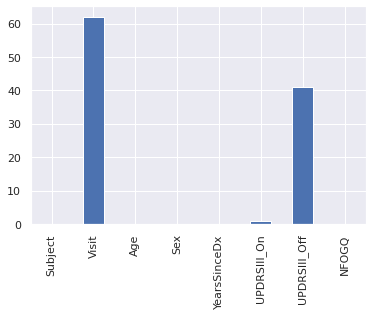

In [8]:
df_subjects.isna().sum().plot.bar()

Visit is not annotated for tdcsfog patients

In [9]:
df_tdcsfog_003f117e14.columns

Index(['Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking'], dtype='object')

In [10]:
df1 = pd.DataFrame(columns=['Id','Time', 'AccV', 'AccML', 'AccAP', 'StartHesitation', 'Turn', 'Walking'])
df1.columns
csv_folder_path = 'tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog'

for file in os.listdir(csv_folder_path):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(csv_folder_path, file),delimiter=',',low_memory=False)
        df['Id']=file[:-4]
        df1 = pd.concat([df1, df])

In [11]:
df1.shape

(7062672, 8)

In [12]:
df1.to_csv('Combined_tdcsfog.csv')

In [13]:
df1= pd.read_csv("Combined_tdcsfog.csv", delimiter = ",",low_memory=False)

In [14]:
df1.drop("Unnamed: 0",axis=1,inplace=True)

<AxesSubplot:>

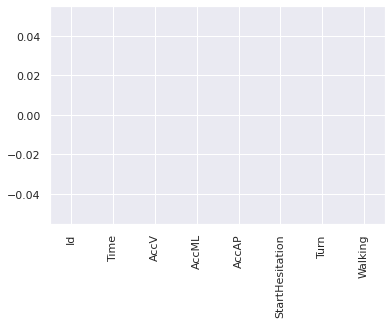

In [15]:
df1.isna().sum().plot.bar()

In [16]:
unique_ids=df1['Id'].unique()
len(unique_ids)

833

<AxesSubplot:>

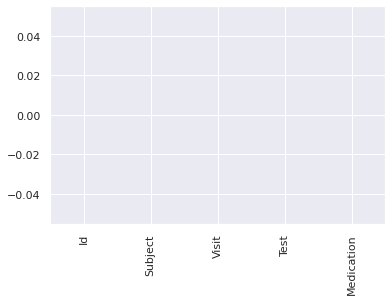

In [17]:
df_tdcsfog_metadata.isna().sum().plot.bar()

In [18]:
final_df = pd.merge(df1, df_tdcsfog_metadata, on='Id')

In [19]:
final_df.shape

(7062672, 12)

In [20]:
final_df.tail()

,Id,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Subject,Visit,Test,Medication
7062667,867e5f1732,6441,-9.24383,0.44934,-2.67836,0,0,0,29f043,4,2,off
7062668,867e5f1732,6442,-9.28303,0.41505,-2.74732,0,0,0,29f043,4,2,off
7062669,867e5f1732,6443,-9.26007,0.35094,-2.74580,0,0,0,29f043,4,2,off
7062670,867e5f1732,6444,-9.31258,0.39918,-2.71852,0,0,0,29f043,4,2,off
7062671,867e5f1732,6445,-9.33366,0.33713,-2.69978,0,0,0,29f043,4,2,off


In [21]:
df_subjects.drop('Visit', axis=1,inplace=True)
df_subjects.head()

,Subject,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,04fcdb,63,M,3.00000,30.00000,NaN,0
1,05595e,56,M,8.00000,28.00000,NaN,0
2,0967b2,59,M,10.00000,38.00000,48.00000,19
3,0967b2,59,M,10.00000,37.00000,44.00000,13
4,097078,70,F,10.00000,27.00000,50.00000,20


In [22]:
final_df1 = pd.merge(final_df, df_subjects, on='Subject')

In [23]:
final_df1.shape

(7062672, 18)

In [24]:
final_df1.head()

,Id,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Subject,Visit,Test,Medication,Age,Sex,YearsSinceDx,UPDRSIII_On,UPDRSIII_Off,NFOGQ
0,662113c140,0,-9.24163,0.09398,-2.49122,0,0,0,f5586f,4,1,off,65,M,10.00000,43.00000,49.00000,15
1,662113c140,1,-9.25806,0.10962,-2.51175,0,0,0,f5586f,4,1,off,65,M,10.00000,43.00000,49.00000,15
2,662113c140,2,-9.25336,0.11202,-2.54780,0,0,0,f5586f,4,1,off,65,M,10.00000,43.00000,49.00000,15
3,662113c140,3,-9.25150,0.11161,-2.55477,0,0,0,f5586f,4,1,off,65,M,10.00000,43.00000,49.00000,15
4,662113c140,4,-9.25538,0.11000,-2.54995,0,0,0,f5586f,4,1,off,65,M,10.00000,43.00000,49.00000,15


<AxesSubplot:>

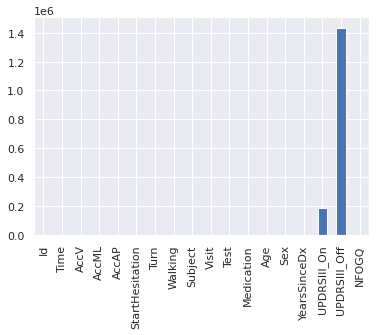

In [25]:
final_df1.isna().sum().plot.bar()

In [26]:
final_df1.drop(["UPDRSIII_On","UPDRSIII_Off"],axis=1,inplace=True)

In [27]:
final_df1.head()

,Id,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Subject,Visit,Test,Medication,Age,Sex,YearsSinceDx,NFOGQ
0,662113c140,0,-9.24163,0.09398,-2.49122,0,0,0,f5586f,4,1,off,65,M,10.00000,15
1,662113c140,1,-9.25806,0.10962,-2.51175,0,0,0,f5586f,4,1,off,65,M,10.00000,15
2,662113c140,2,-9.25336,0.11202,-2.54780,0,0,0,f5586f,4,1,off,65,M,10.00000,15
3,662113c140,3,-9.25150,0.11161,-2.55477,0,0,0,f5586f,4,1,off,65,M,10.00000,15
4,662113c140,4,-9.25538,0.11000,-2.54995,0,0,0,f5586f,4,1,off,65,M,10.00000,15


In [28]:
final_df1.dtypes

Id                  object
Time                 int64
AccV               float64
AccML              float64
AccAP              float64
StartHesitation      int64
Turn                 int64
Walking              int64
Subject             object
Visit                int64
Test                 int64
Medication          object
Age                  int64
Sex                 object
YearsSinceDx       float64
NFOGQ                int64
dtype: object

In [29]:
final_df1['StartHesitation'] = final_df1['StartHesitation'].astype(int)
final_df1['Turn'] = final_df1['Turn'].astype(int)
final_df1['Walking'] = final_df1['Walking'].astype(int)
final_df1['Sex'] = final_df1['Sex'].astype(str)
final_df1['Medication'] = final_df1['Medication'].astype(str)

In [30]:
gender_dummies = pd.get_dummies(final_df1['Sex'], prefix='gender')
df = pd.concat([final_df1, gender_dummies], axis=1)

In [31]:
df.drop('Sex', axis=1,inplace=True)

In [32]:
df.tail(10)

,Id,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Subject,Visit,Test,Medication,Age,YearsSinceDx,NFOGQ,gender_F,gender_M
7062662,be8fdfa712,62310,-9.82314,-0.87696,-0.80145,0,0,0,11404e,2,2,off,67,4.00000,29,1,0
7062663,be8fdfa712,62311,-9.83544,-0.91912,-0.82608,0,0,0,11404e,2,2,off,67,4.00000,29,1,0
7062664,be8fdfa712,62312,-9.84430,-0.93866,-0.84694,0,0,0,11404e,2,2,off,67,4.00000,29,1,0
7062665,be8fdfa712,62313,-9.83609,-0.93281,-0.85064,0,0,0,11404e,2,2,off,67,4.00000,29,1,0
7062666,be8fdfa712,62314,-9.83201,-0.90343,-0.85581,0,0,0,11404e,2,2,off,67,4.00000,29,1,0
7062667,be8fdfa712,62315,-9.83641,-0.86480,-0.86916,0,0,0,11404e,2,2,off,67,4.00000,29,1,0
7062668,be8fdfa712,62316,-9.84140,-0.84061,-0.86765,0,0,0,11404e,2,2,off,67,4.00000,29,1,0
7062669,be8fdfa712,62317,-9.84499,-0.81195,-0.87878,0,0,0,11404e,2,2,off,67,4.00000,29,1,0
7062670,be8fdfa712,62318,-9.84259,-0.81492,-0.87580,0,0,0,11404e,2,2,off,67,4.00000,29,1,0
7062671,be8fdfa712,62319,-9.83934,-0.83012,-0.87061,0,0,0,11404e,2,2,off,67,4.00000,29,1,0


In [33]:
Med_dummies = pd.get_dummies(final_df1['Medication'], prefix='med')
df = pd.concat([df, Med_dummies], axis=1)
df.drop('Medication', axis=1,inplace=True)

In [34]:
df.tail(10)

,Id,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Subject,Visit,Test,Age,YearsSinceDx,NFOGQ,gender_F,gender_M,med_off,med_on
7062662,be8fdfa712,62310,-9.82314,-0.87696,-0.80145,0,0,0,11404e,2,2,67,4.00000,29,1,0,1,0
7062663,be8fdfa712,62311,-9.83544,-0.91912,-0.82608,0,0,0,11404e,2,2,67,4.00000,29,1,0,1,0
7062664,be8fdfa712,62312,-9.84430,-0.93866,-0.84694,0,0,0,11404e,2,2,67,4.00000,29,1,0,1,0
7062665,be8fdfa712,62313,-9.83609,-0.93281,-0.85064,0,0,0,11404e,2,2,67,4.00000,29,1,0,1,0
7062666,be8fdfa712,62314,-9.83201,-0.90343,-0.85581,0,0,0,11404e,2,2,67,4.00000,29,1,0,1,0
7062667,be8fdfa712,62315,-9.83641,-0.86480,-0.86916,0,0,0,11404e,2,2,67,4.00000,29,1,0,1,0
7062668,be8fdfa712,62316,-9.84140,-0.84061,-0.86765,0,0,0,11404e,2,2,67,4.00000,29,1,0,1,0
7062669,be8fdfa712,62317,-9.84499,-0.81195,-0.87878,0,0,0,11404e,2,2,67,4.00000,29,1,0,1,0
7062670,be8fdfa712,62318,-9.84259,-0.81492,-0.87580,0,0,0,11404e,2,2,67,4.00000,29,1,0,1,0
7062671,be8fdfa712,62319,-9.83934,-0.83012,-0.87061,0,0,0,11404e,2,2,67,4.00000,29,1,0,1,0


In [35]:
df.head()

,Id,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Subject,Visit,Test,Age,YearsSinceDx,NFOGQ,gender_F,gender_M,med_off,med_on
0,662113c140,0,-9.24163,0.09398,-2.49122,0,0,0,f5586f,4,1,65,10.00000,15,0,1,1,0
1,662113c140,1,-9.25806,0.10962,-2.51175,0,0,0,f5586f,4,1,65,10.00000,15,0,1,1,0
2,662113c140,2,-9.25336,0.11202,-2.54780,0,0,0,f5586f,4,1,65,10.00000,15,0,1,1,0
3,662113c140,3,-9.25150,0.11161,-2.55477,0,0,0,f5586f,4,1,65,10.00000,15,0,1,1,0
4,662113c140,4,-9.25538,0.11000,-2.54995,0,0,0,f5586f,4,1,65,10.00000,15,0,1,1,0


In [36]:
cond = [(df['StartHesitation'] == 1),(df['Turn'] == 1),(df['Walking'] == 1)]
features = ['StartHesitation', 'Turn', 'Walking']
df['Class'] = np.select(cond, features, default='None')

In [37]:
df['Class'].value_counts().to_frame()

,Class
None,4871262
Turn,1678782
StartHesitation,304790
Walking,207838


In [38]:
df.head()

,Id,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Subject,Visit,Test,Age,YearsSinceDx,NFOGQ,gender_F,gender_M,med_off,med_on,Class
0,662113c140,0,-9.24163,0.09398,-2.49122,0,0,0,f5586f,4,1,65,10.00000,15,0,1,1,0,None
1,662113c140,1,-9.25806,0.10962,-2.51175,0,0,0,f5586f,4,1,65,10.00000,15,0,1,1,0,None
2,662113c140,2,-9.25336,0.11202,-2.54780,0,0,0,f5586f,4,1,65,10.00000,15,0,1,1,0,None
3,662113c140,3,-9.25150,0.11161,-2.55477,0,0,0,f5586f,4,1,65,10.00000,15,0,1,1,0,None
4,662113c140,4,-9.25538,0.11000,-2.54995,0,0,0,f5586f,4,1,65,10.00000,15,0,1,1,0,None


In [39]:
train_df = df[['AccV','AccML','AccAP','Class']]

In [40]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
train_df['target'] = LabelEncoder.fit_transform(train_df['Class'])

<ipython-input-40-1e2d66eb19ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['target'] = LabelEncoder.fit_transform(train_df['Class'])


In [86]:
X = train_df.drop(['Class','target'], axis=1).values
y = train_df['target'].values

In [87]:
random_state=1234

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_state)

In [89]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

5650137 1412535 5650137 1412535


In [90]:
# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.001

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="lbfgs", multi_class='auto', max_iter=50000).fit(X_train, y_train)
print (model)

LogisticRegression(C=1000.0, max_iter=50000)


In [91]:
target_predictions = model.predict(X_test)
print('Predicted labels: ', target_predictions[:15])
print('Actual labels   : ' ,y_test[:15])

Predicted labels:  [0 2 0 0 0 0 0 0 0 0 0 0 2 0 0]
Actual labels   :  [0 2 2 0 2 0 0 3 1 2 0 0 2 0 0]


In [92]:
from sklearn.metrics import accuracy_score
print(f"Accuracy score: {accuracy_score(y_test, target_predictions)}")

Accuracy score: 0.6986524227718252


In [93]:
from sklearn.metrics import precision_score, recall_score
print("Overall Precision:",precision_score(y_test, target_predictions,average='micro'))
print("Overall Recall:",recall_score(y_test, target_predictions,average='micro'))

Overall Precision: 0.6986524227718252
Overall Recall: 0.6986524227718252


In [99]:
from sklearn. metrics import classification_report

print(classification_report(y_test, target_predictions))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82    973722
           1       0.07      0.00      0.00     60997
           2       0.50      0.15      0.23    335956
           3       0.22      0.00      0.00     41860

    accuracy                           0.70   1412535
   macro avg       0.37      0.28      0.26   1412535
weighted avg       0.62      0.70      0.62   1412535



In [94]:
import lightgbm as lgb


#Converting the dataset in proper LGB format
d_train=lgb.Dataset(X_train, label=y_train)
#setting up the parameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=7
params['num_class']=4 #no.of unique values in the target class not inclusive of the end value
params['verbose']=-1
#training the model
clf=lgb.train(params,d_train,1000)  #training the model on 1,000 epocs
#prediction on the test dataset
y_pred_1=clf.predict(X_test)

/home/rupamay/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:366: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/rupamay/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:366: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/home/rupamay/anaconda3/lib/python3.8/site-packages/dask/dataframe/utils.py:366: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


In [96]:
y_pred_1[:1]

array([[0.36814866, 0.12369252, 0.40211893, 0.10603988]])

In [98]:
from sklearn.metrics import precision_score
precision_score(y_test, np.argmax(y_pred_1, axis=-1), average='micro')

0.7279508118382907

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RandomForest_clf = RandomForestClassifier(max_depth=5, random_state=0)
RandomForest_clf.fit(X_train, y_train)

RandomForest_predictions=RandomForest_clf.predict(X_test)

In [103]:
print('Predicted labels: ', RandomForest_predictions[:15])
print('Actual labels   : ' ,y_test[:15])

Predicted labels:  [0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual labels   :  [0 2 2 0 2 0 0 3 1 2 0 0 2 0 0]


In [104]:
from sklearn.metrics import accuracy_score
print(f"Accuracy score: {accuracy_score(y_test, RandomForest_predictions)}")

Accuracy score: 0.7011996162926937


In [105]:
from sklearn.metrics import precision_score, recall_score
print("Overall Precision:",precision_score(y_test, RandomForest_predictions,average='micro'))
print("Overall Recall:",recall_score(y_test, RandomForest_predictions,average='micro'))

Overall Precision: 0.7011996162926937
Overall Recall: 0.7011996162926937


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoostingClassifier_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GradientBoostingClassifier_clf.fit(X_train, y_train)
GradientBoostingClassifier_predictions=GradientBoostingClassifier_clf.predict(X_test)

In [ ]:
print('Predicted labels: ', RandomForest_predictions[:15])
print('Actual labels   : ' ,y_test[:15])

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy score: {accuracy_score(y_test, RandomForest_predictions)}")

In [ ]:
from sklearn.metrics import precision_score, recall_score
print("Overall Precision:",precision_score(y_test, RandomForest_predictions,average='micro'))
print("Overall Recall:",recall_score(y_test, RandomForest_predictions,average='micro'))